Epoch 0, Loss: 1.5937
Epoch 1000, Loss: 0.7523
Epoch 2000, Loss: 0.7495
Epoch 3000, Loss: 2.7656
Epoch 4000, Loss: 3.1052


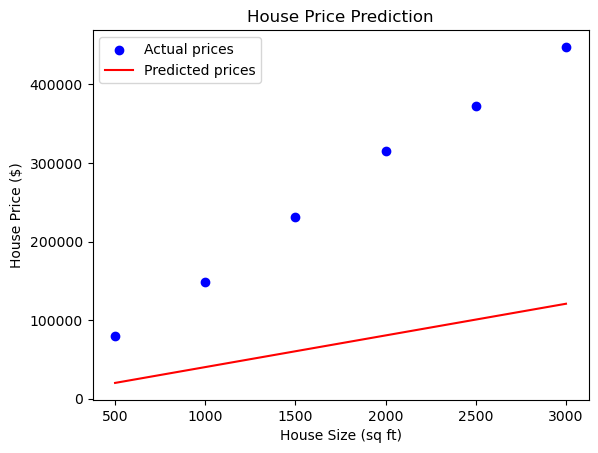

Predicted prices for test sizes:
Size: 1200 sq ft -> Predicted Price: $48292.70
Size: 1600 sq ft -> Predicted Price: $64414.04
Size: 2200 sq ft -> Predicted Price: $88596.04
Size: 2700 sq ft -> Predicted Price: $108747.71


In [2]:
import numpy as np
import matplotlib.pyplot as plt

class SimpleNeuralNetwork:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate=0.01):
        self.learning_rate = learning_rate
        
        # Initialize weights and biases
        self.w1 = np.random.normal(size=(input_neurons, hidden_neurons))
        self.b1 = np.random.normal(size=hidden_neurons)
        self.w2 = np.random.normal(size=(hidden_neurons, output_neurons))
        self.b2 = np.random.normal(size=output_neurons)

    @staticmethod
    def relu(x):
        return np.maximum(0, x)

    @staticmethod
    def relu_derivative(x):
        return np.where(x > 0, 1, 0)

    def forward_pass(self, x):
        self.z1 = np.dot(x, self.w1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        return self.relu(self.z2)  # Apply ReLU activation to the output

    def compute_loss(self, y_pred, y_true):
        return np.mean((y_pred - y_true) ** 2)

    def back_propagate(self, x, y_true, y_pred):
        # Output layer error
        error_output = y_pred - y_true
        d_output = error_output
        
        # Hidden layer error
        error_hidden = d_output.dot(self.w2.T)
        d_hidden = error_hidden * self.relu_derivative(self.z1)
        
        # Update weights and biases
        self.w2 -= self.a1.T.dot(d_output) * self.learning_rate
        self.b2 -= np.sum(d_output, axis=0) * self.learning_rate
        self.w1 -= x.T.dot(d_hidden) * self.learning_rate
        self.b1 -= np.sum(d_hidden, axis=0) * self.learning_rate

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            y_pred = self.forward_pass(X)
            loss = self.compute_loss(y_pred, y)
            self.back_propagate(X, y, y_pred)
            
            if epoch % 1000 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        return self.forward_pass(X)


np.random.seed(42)

# House sizes (in square feet)
X = np.array([[500], [1000], [1500], [2000], [2500], [3000]])

# Corresponding house prices (in dollars, with some added noise)
y = X * 150 + (np.random.normal(size=X.shape) * 10000)  # Use np.random.normal for clarity

# Normalize the data
X_normalized = (X - np.mean(X)) / np.std(X)
y_normalized = (y - np.mean(y)) / np.std(y)

# Initialize and train the neural network
nn = SimpleNeuralNetwork(input_neurons=1, hidden_neurons=1, output_neurons=1, learning_rate=0.01)
nn.train(X_normalized, y_normalized, epochs=5000)

# Denormalize predictions
predicted_prices = nn.predict(X_normalized) * np.std(y) + np.mean(y)
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price ($)')
predicted_prices = nn.predict(X)

# Plotting the data
plt.scatter(X, y, color='blue', label='Actual prices')
plt.plot(X, predicted_prices, color='red', label='Predicted prices')
plt.xlabel('House Size (sq ft)')  # Correctly labeled
plt.ylabel('House Price ($)')  # Correctly labeled
plt.title('House Price Prediction')
plt.legend()
plt.show()

# Test the model on new data
test_sizes = np.array([[1200], [1600], [2200], [2700]])
predicted_prices = nn.predict(test_sizes)

# Display the predictions
print("Predicted prices for test sizes:")
for size, price in zip(test_sizes, predicted_prices):
    print(f"Size: {size[0]} sq ft -> Predicted Price: ${price[0]:.2f}")
